In [7]:
import pandas as pd
import numpy as np
import sklearn

train_data_path = "data_files/train.csv"
train_data = pd.read_csv(train_data_path)

In [8]:
# EDA
# print(type(train_data))
# train_data.columns

# Relevant numerical features
features_my_selected = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

X = train_data[features_my_selected]
y = train_data.SalePrice
print(X.shape)  # This will display the shape of X
print(y.shape)  # This will display the shape of y
X.head()

(1460, 22)
(1460,)


,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,60,7,5,2003,2003,0,150,856,856,854,...,0,2003.0,2,548,0,61,0,0,0,0
1,20,6,8,1976,1976,0,284,1262,1262,0,...,1,1976.0,2,460,298,0,0,0,0,0
2,60,7,5,2001,2002,0,434,920,920,866,...,1,2001.0,2,608,0,42,0,0,0,0
3,70,7,5,1915,1970,0,540,756,961,756,...,1,1998.0,3,642,0,35,272,0,0,0
4,60,8,5,2000,2000,0,490,1145,1145,1053,...,1,2000.0,3,836,192,84,0,0,0,0


In [9]:
# Remove rows with missing values
X_y = pd.concat([X, y], axis=1)
X_y = X_y.dropna()
print(X_y.shape)

(1379, 23)


In [10]:
# Final X, y
X = X_y.iloc[:, 0:22]
y = X_y.SalePrice
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()
y.describe()

X shape: (1379, 22)
y shape: (1379,)


count      1379.00000
mean     185479.51124
std       79023.89060
min       35311.00000
25%      134000.00000
50%      167500.00000
75%      217750.00000
max      755000.00000
Name: SalePrice, dtype: float64

In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train_X, cv_test_X, train_y, cv_test_y = train_test_split(X, y, train_size=0.6, random_state=1)
cv_X, test_X, cv_y, test_y = train_test_split(cv_test_X, cv_test_y, train_size=0.5, random_state=1)
print("Train X:", train_X.shape)
print("Train y:", train_y.shape)
print("cv X:", cv_X.shape)
print("cv y:", cv_y.shape)
print("test X:", test_X.shape)
print("test y:", test_y.shape)

Train X: (827, 22)
Train y: (827,)
cv X: (276, 22)
cv y: (276,)
test X: (276, 22)
test y: (276,)


In [12]:
# Model Creation and fitting
from sklearn.metrics import mean_absolute_error

best_leaf_nodes = -1
lowest_mae_cv = float('inf')
mae_cvs = []
mae_trains = []
try_leaf_nodes = [5, 50, 500, 5000]
for leaf_nodes in try_leaf_nodes:
    my_model = RandomForestRegressor(max_leaf_nodes=leaf_nodes)
    my_model.fit(train_X, train_y)
    
    y_pred_train = my_model.predict(train_X)
    mae_train = mean_absolute_error(train_y, y_pred_train)
    mae_trains.append(mae_train)

    y_pred_cv = my_model.predict(cv_X)
    mae_cv = mean_absolute_error(cv_y, y_pred_cv)
    mae_cvs.append(mae_cv)

    if(mae_cv < lowest_mae_cv):
        lowest_mae_cv = mae_cv
        best_leaf_nodes = leaf_nodes
    print(f"Leaf Nodes: {leaf_nodes}\t MAE: {mae_cv}")
    
print(f"Best Leaf Nodes: {best_leaf_nodes}")

Leaf Nodes: 5	 MAE: 29697.709254939895
Leaf Nodes: 50	 MAE: 21293.552258743028
Leaf Nodes: 500	 MAE: 19240.673168952726
Leaf Nodes: 5000	 MAE: 19960.499882677705
Best Leaf Nodes: 500


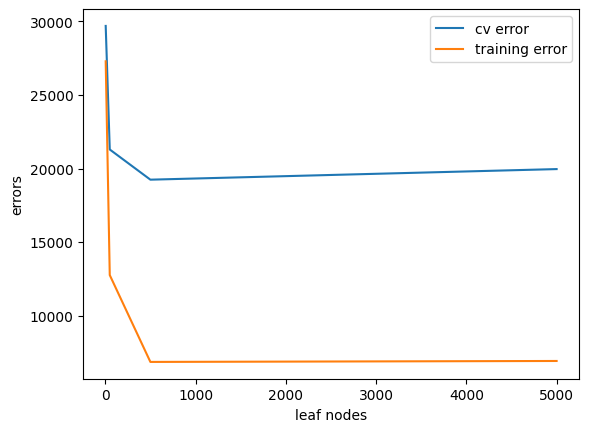

In [13]:
# # Plot the errors
import matplotlib.pyplot as plt

plt.plot(try_leaf_nodes, mae_cvs, label='cv error')
plt.plot(try_leaf_nodes, mae_trains, label='training error')
plt.xlabel('leaf nodes')
plt.ylabel('errors')
plt.legend()
plt.show()

In [14]:
# Report error of my_model
y_pred = my_model.predict(test_X)
mae = mean_absolute_error(test_y, y_pred)
print(f"MAE Error of our model: {mae}")

MAE Error of our model: 21514.011606280194


In [15]:
# Final model
final_model = RandomForestRegressor(max_leaf_nodes=500)
final_model.fit(X, y)

RandomForestRegressor(max_leaf_nodes=500)

In [16]:
# Read test data
test_data = pd.read_csv(f"data_files/test.csv")
display(test_data.head())

test_data_X = test_data[features_my_selected]
display(test_data_X.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,20,5,6,1961,1961,144.0,270.0,882.0,896,0,...,0,1961.0,1.0,730.0,140,0,0,0,120,0
1,20,6,6,1958,1958,0.0,406.0,1329.0,1329,0,...,0,1958.0,1.0,312.0,393,36,0,0,0,0
2,60,5,5,1997,1998,0.0,137.0,928.0,928,701,...,1,1997.0,2.0,482.0,212,34,0,0,0,0
3,60,6,6,1998,1998,0.0,324.0,926.0,926,678,...,1,1998.0,2.0,470.0,360,36,0,0,0,0
4,120,8,5,1992,1992,0.0,1017.0,1280.0,1280,0,...,0,1992.0,2.0,506.0,0,82,0,0,144,0


In [20]:
# Predictions
predictions = final_model.predict(test_data_X)

output = pd.DataFrame({"ID":test_data.Id, "SalePrice":predictions})
output.to_csv(f"./predictions/try2_21Oct_predictions.csv", index=False) 
print(output.shape)
display(output.head())

(1459, 2)


,ID,SalePrice
0,1461,128499.250434
1,1462,156646.749409
2,1463,170795.513658
3,1464,185384.017999
4,1465,209088.808195
